In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
import glob
import pickle
from sklearn import metrics
pd.set_option('display.max_columns', None)

In [59]:
file_path = 'C:/Users/svenj/Documents/Uni/Bachelorarbeit/Codes/data_all_reset.csv'

data_all_reset = pd.read_csv(file_path)
data_all_reset

,Particle ID,Area (ABD),Area (Filled),Aspect Ratio,Average Blue,Average Green,Average Red,Calibration Factor,Calibration Image,Camera,Capture X,Capture Y,Ch1 Area,Ch1 Peak,Ch1 Width,Ch2 Area,Ch2 Peak,Ch2 Width,Ch2/Ch1 Ratio,Circle Fit,Circularity,Circularity (Hu),Compactness,Convex Perimeter,Convexity,Date,Diameter (ABD),Diameter (ESD),Diameter (FD),Edge Gradient,Elapsed Time,Elongation,Feret Angle Max,Feret Angle Min,Fiber Curl,Fiber Straightness,Filter Score,Geodesic Aspect Ratio,Geodesic Length,Geodesic Thickness,Image File,Image Height,Image Width,Image X,Image Y,Intensity,Length,Original Reference ID,Particles Per Chain,Perimeter,Ratio Blue/Green,Ratio Red/Blue,Ratio Red/Green,Roughness,Scatter Area,Scatter Peak,Scatter Width,Sigma Intensity,Source Image,Sphere Complement,Sphere Count,Sphere Unknown,Sphere Volume,Sum Intensity,Symmetry,Time,Timestamp,Transparency,Volume (ABD),Volume (ESD),Width,Class,path
0,1,225.6288,242.5331,0.7807,103.6006,108.9748,111.5660,0.7075,1,1,478,885,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6528,0.7207,0.8890,1.3876,67.8397,0.9575,2023-07-07,16.9493,20.1441,17.5728,61.5870,1.688,1.8052,45.0,-45.0,0.0749,0.9304,0.0,0.5540,24.7150,13.6911,NELU-C2-10x_000001.tif,37,34,0,0,107.6777,22.9938,4C7B7810-460E-4A30-A499-EAD2BF8B789B,1,76.8122,0.9507,1.0769,1.0238,1.1323,0.0,0.0,0.0,22.8898,32,0.0,0,0.0,0.0,68483.0,0.6080,10:46:13,2023-07-07T10:46:13.597,0.1586,2549.5040,4279.983,17.3338,WRONG,C:/Users/svenj/Documents/Uni/Bachelorarbeit/Co...
1,2,58.4998,58.8657,0.6323,103.9087,115.0776,118.6621,0.7075,1,1,861,541,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5818,0.3583,0.7126,2.7910,44.0031,0.7692,2023-07-07,8.6304,12.5188,8.6574,60.0400,1.688,6.6170,-85.0,0.0,0.7746,0.5635,0.0,0.1511,26.9941,4.0795,NELU-C2-10x_000001.tif,29,23,36,0,112.1370,15.2112,CB5DBFBA-91B3-49D0-9F3F-40D0F3135833,1,62.1472,0.9029,1.1420,1.0311,1.4123,0.0,0.0,0.0,9.8916,32,0.0,0,0.0,0.0,24558.0,0.4728,10:46:13,2023-07-07T10:46:13.597,0.3106,336.5858,1027.280,10.2588,WRONG,C:/Users/svenj/Documents/Uni/Bachelorarbeit/Co...
2,3,173.9068,176.7952,0.4683,113.4023,124.5566,127.6934,0.7075,1,1,221,1391,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4288,0.3191,0.7033,3.1334,66.3636,0.8405,2023-07-07,14.8804,19.6135,15.0034,51.7025,1.735,7.7141,-70.0,20.0,0.7824,0.5610,0.0,0.1296,44.7665,5.8032,NELU-C2-10x_000001.tif,40,34,61,0,121.5781,25.1163,8777DAD3-5004-4A14-866F-1C43EE9BD1A2,1,101.1395,0.9104,1.1260,1.0252,1.5240,0.0,0.0,0.0,17.2754,33,0.0,0,0.0,0.0,62248.0,0.5822,10:46:13,2023-07-07T10:46:13.649,0.2413,1725.1970,3950.591,11.6738,WRONG,C:/Users/svenj/Documents/Uni/Bachelorarbeit/Co...
3,4,90.9054,90.9054,0.2330,79.6361,87.9016,91.2787,0.7075,1,1,654,509,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1823,0.4398,0.4225,2.2739,59.0858,1.0000,2023-07-07,10.7585,17.3534,10.7585,159.7470,1.735,4.9412,15.0,-75.0,0.0636,0.9402,0.0,0.2024,27.4659,5.5585,NELU-C2-10x_000001.tif,20,43,97,0,85.8197,25.8238,458E8477-C0C7-4C20-8E2C-586257868DC1,1,66.0489,0.9060,1.1462,1.0384,1.1178,0.0,0.0,0.0,21.0279,33,0.0,0,0.0,0.0,26175.0,0.6954,10:46:13,2023-07-07T10:46:13.649,0.3800,652.0009,2736.230,4.5987,NELU,C:/Users/svenj/Documents/Uni/Bachelorarbeit/Co...
4,5,27.1872,27.1872,0.5611,132.4884,137.3721,138.3876,0.7075,1,1,599,1756,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4863,0.1680,0.4172,5.9518,40.4736,0.5233,2023-07-07,5.8835,11.4183,5.8835,21.5500,1.782,16.6380,-10.0,-80.0,1.1548,0.4641,0.0,0.0601,32.7772,1.9700,NELU-C2-10x_000001.tif,21,30,142,0,136.0155,15.2112,75A12674-70A3-4CF8-A84C-7118003B215F,2,69.4945,0.9644,1.0445,1.0074,1.7170,0.0,0.0,0.0,4.8224,34,0.0,0,0.0,0.0,17546.0,0.5765,10:46:13,2023-07-07T10:46:13.700,0.4847,106.6374,779.469,7.4287,WRONG,C:/Users/svenj/Documents/Uni/Bachelorarbeit/Co...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166513,6770,45.9070,48.0345

## Remove unnessecary columns

In [60]:
columns_to_drop = ['Particle ID','Average Blue', 'Average Green', 'Average Red','Calibration Factor','Calibration Image','Camera', 'Capture X', 'Capture Y', 'Ch1 Area', 'Ch1 Peak', 'Ch1 Width', 'Ch2 Area', 'Ch2 Peak', 'Ch2 Width', 'Ch2/Ch1 Ratio', 'Date', 'Ratio Blue/Green','Ratio Red/Blue', 'Ratio Red/Green','Date','Elapsed Time', 'Filter Score', 'Image File', 'Original Reference ID', 'Scatter Area', 'Scatter Peak', 'Scatter Width', 'Source Image', 'Sphere Complement', 'Sphere Count', 'Sphere Unknown', 'Sphere Volume','Time', 'Timestamp', 'path']
data_wrong= data_all_reset.drop(columns=columns_to_drop)

In [61]:
print(data_wrong[data_wrong.Class == 'ANCR'].shape[0])
print(data_wrong[data_wrong.Class == 'NELU'].shape[0])
print(data_wrong[data_wrong.Class == 'TRSP'].shape[0])
print(data_wrong[data_wrong.Class == 'ANLO'].shape[0])
print(data_wrong[data_wrong.Class == 'TEMA'].shape[0])
print(data_wrong[data_wrong.Class == 'LUCU'].shape[0])

1612
1918
1503
997
1835
3679


In [62]:
data_wrong.Class.unique()
data_wrong

,Area (ABD),Area (Filled),Aspect Ratio,Circle Fit,Circularity,Circularity (Hu),Compactness,Convex Perimeter,Convexity,Diameter (ABD),Diameter (ESD),Diameter (FD),Edge Gradient,Elongation,Feret Angle Max,Feret Angle Min,Fiber Curl,Fiber Straightness,Geodesic Aspect Ratio,Geodesic Length,Geodesic Thickness,Image Height,Image Width,Image X,Image Y,Intensity,Length,Particles Per Chain,Perimeter,Roughness,Sigma Intensity,Sum Intensity,Symmetry,Transparency,Volume (ABD),Volume (ESD),Width,Class
0,225.6288,242.5331,0.7807,0.6528,0.7207,0.8890,1.3876,67.8397,0.9575,16.9493,20.1441,17.5728,61.5870,1.8052,45.0,-45.0,0.0749,0.9304,0.5540,24.7150,13.6911,37,34,0,0,107.6777,22.9938,1,76.8122,1.1323,22.8898,68483.0,0.6080,0.1586,2549.5040,4279.983,17.3338,WRONG
1,58.4998,58.8657,0.6323,0.5818,0.3583,0.7126,2.7910,44.0031,0.7692,8.6304,12.5188,8.6574,60.0400,6.6170,-85.0,0.0,0.7746,0.5635,0.1511,26.9941,4.0795,29,23,36,0,112.1370,15.2112,1,62.1472,1.4123,9.8916,24558.0,0.4728,0.3106,336.5858,1027.280,10.2588,WRONG
2,173.9068,176.7952,0.4683,0.4288,0.3191,0.7033,3.1334,66.3636,0.8405,14.8804,19.6135,15.0034,51.7025,7.7141,-70.0,20.0,0.7824,0.5610,0.1296,44.7665,5.8032,40,34,61,0,121.5781,25.1163,1,101.1395,1.5240,17.2754,62248.0,0.5822,0.2413,1725.1970,3950.591,11.6738,WRONG
3,90.9054,90.9054,0.2330,0.1823,0.4398,0.4225,2.2739,59.0858,1.0000,10.7585,17.3534,10.7585,159.7470,4.9412,15.0,-75.0,0.0636,0.9402,0.2024,27.4659,5.5585,20,43,97,0,85.8197,25.8238,1,66.0489,1.1178,21.0279,26175.0,0.6954,0.3800,652.0009,2736.230,4.5987,NELU
4,27.1872,27.1872,0.5611,0.4863,0.1680,0.4172,5.9518,40.4736,0.5233,5.8835,11.4183,5.8835,21.5500,16.6380,-10.0,-80.0,1.1548,0.4641,0.0601,32.7772,1.9700,21,30,142,0,136.0155,15.2112,2,69.4945,1.7170,4.8224,17546.0,0.5765,0.4847,106.6374,779.469,7.4287,WRONG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166513,45.9070,48.0345,0.3670,0.2740,0.0939,0.3485,10.6525,51.2507,0.6013,7.6453,14.8968,7.8204,88.2188,31.4339,30.0,-45.0,1.5338,0.3947,0.0318,54.6767,1.7394,29,32,874,237,132.8913,21.5787,1,112.8322,2.2016,41.5695,24452.0,0.2571,0.4868,234.0000,1730.000,6.7213,WRONG
166514,123.5345,148.5185,0.4621,0.0687,0.1154,0.2280,8.6680,111.7554,0.3446,12.5415,34.0975,13.7513,76.0245,25.1918,-60.0,35.0,0.6767,0.5964,0.0397,75.3290,2.9902,63,49,908,237,127.4201,44.9263,1,156.6384,1.4016,33.3056,49439.0,0.3158,0.6322,1030.0000,20800.000,19.4563,LUCU
166515,65.1297,74.1061,0.3652,0.1437,0.0691,0.2379,14.4640,79.3260,0.3534,9.1064,23.7602,9.7136,69.7368,43.4171,0.0,85.0,1.4472,0.4086,0.0230,75.3142,1.7347,28,52,959,237,137.3207,30.7763,1,154.0978,1.9426,36.2132,32545.0,0.2768,0.6167,395.0000,7020.000,12.3812,LUCU
166516,119.5490,150.5521,0.7210,0.4475,0.1002,0.3019,9.9814,90.5558,0.3790,12.3375,27.3370,13.8452,97.1787,29.3233,55.0,10.0,1.4840,0.4026,0.0341,81.7220,2.7869,48,42,1013,237,114.9074,32.8987,1,169.0178,1.8664,33.6843,43435.0,0.5084,0.5487,983.0000,10700.000,22.9938,LUCU


In [63]:
# drop all samples with label WRONG and Debris
data = data_wrong.drop(data_wrong[data_wrong.Class == 'WRONG'].index, inplace=False)
data

,Area (ABD),Area (Filled),Aspect Ratio,Circle Fit,Circularity,Circularity (Hu),Compactness,Convex Perimeter,Convexity,Diameter (ABD),Diameter (ESD),Diameter (FD),Edge Gradient,Elongation,Feret Angle Max,Feret Angle Min,Fiber Curl,Fiber Straightness,Geodesic Aspect Ratio,Geodesic Length,Geodesic Thickness,Image Height,Image Width,Image X,Image Y,Intensity,Length,Particles Per Chain,Perimeter,Roughness,Sigma Intensity,Sum Intensity,Symmetry,Transparency,Volume (ABD),Volume (ESD),Width,Class
3,90.9054,90.9054,0.2330,0.1823,0.4398,0.4225,2.2739,59.0858,1.0000,10.7585,17.3534,10.7585,159.7470,4.9412,15.0,-75.0,0.0636,0.9402,0.2024,27.4659,5.5585,20,43,97,0,85.8197,25.8238,1,66.0489,1.1178,21.0279,26175.0,0.6954,0.3800,652.0009,2736.230,4.5987,NELU
10,99.4467,105.7104,0.2579,0.2432,0.5121,0.4734,1.9526,57.7139,1.0000,11.2525,16.8817,11.6015,178.0658,3.8763,-70.0,25.0,0.0271,0.9736,0.2580,25.7978,6.6552,40,26,382,0,92.5535,25.1163,1,64.9061,1.1246,23.1323,30265.0,0.7011,0.3334,746.0183,2519.126,5.3063,NELU
12,97.8874,162.3962,0.2688,0.1977,0.5287,0.4866,1.8914,67.9420,1.0000,11.1640,20.1441,14.3795,82.1064,3.6694,65.0,-20.0,0.0406,0.9610,0.2725,29.8159,8.1255,47,25,433,0,102.7802,28.6538,1,75.8828,1.1169,14.8035,33198.0,0.8101,0.4458,728.5412,4279.983,6.7213,NELU
14,96.3309,119.5490,0.3461,0.0668,0.1797,0.4486,5.5638,64.9977,0.8173,11.0748,19.2597,12.3375,70.5274,15.4143,70.0,-10.0,0.9827,0.5044,0.0649,54.0051,3.5036,46,21,490,0,124.2539,27.2387,1,115.0172,1.7696,10.6368,39637.0,0.4088,0.4250,711.2332,3740.664,6.7213,NELU
16,119.9470,127.1327,0.2175,0.1328,0.4584,0.4012,2.1816,66.4822,1.0000,12.3580,19.6921,12.7228,155.6742,4.6382,-30.0,65.0,0.0340,0.9671,0.2156,30.3598,6.5455,27,46,572,0,82.1029,29.3613,1,73.8106,1.1102,19.4487,31117.0,0.7542,0.3724,988.2064,3998.284,5.3063,NELU
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166508,82.0731,95.1653,0.2817,0.1195,0.1569,0.2487,6.3741,80.2568,0.4573,10.2225,24.0943,11.0076,80.2180,17.9692,-80.0,5.0,0.5537,0.6436,0.0557,53.3131,2.9669,55,26,641,237,122.0426,34.3137,1,112.5601,1.4025,39.0471,34416.0,0.3658,0.5757,559.0000,7320.000,10.9663,LUCU
166512,112.0144,133.1521,0.5078,0.1658,0.0612,0.1536,16.3310,113.9731,0.2586,11.9424,34.8050,13.0205,85.3724,49.2850,-45.0,70.0,1.4358,0.4105,0.0203,100.8167,2.0456,53,65,807,237,123.0056,41.3888,1,205.7245,1.8050,32.7749,44159.0,0.4158,0.6569,892.0000,22100.000,24.4088,LUCU
166514,123.5345,148.5185,0.4621,0.0687,0.1154,0.2280,8.6680,111.7554,0.3446,12.5415,34.0975,13.7513,76.0245,25.1918,-60.0,35.0,0.6767,0.5964,0.0397,75.3290,2.9902,63,49,908,237,127.4201,44.9263,1,156.6384,1.4016,33.3056,49439.0,0.3158,0.6322,1030.0000,20800.000,19.4563,LUCU
166515,65.1297,74.1061,0.3652,0.1437,0.0691,0.2379,14.4640,79.3260,0.3534,9.1064,23.7602,9.7136,69.7368,43.4171,0.0,85.0,1.4472,0.4086,0.0230,75.3142,1.7347,28,52,959,237,137.3207,30.7763,1,154.0978,1.9426,36.2132,32545.0,0.2768,0.6167,395.0000,7020.000,12.3812,LUCU


In [64]:
print(data[data.Class == 'ANCR'].shape[0])
print(data[data.Class == 'NELU'].shape[0])
print(data[data.Class == 'TRSP'].shape[0])
print(data[data.Class == 'ANLO'].shape[0])
print(data[data.Class == 'TEMA'].shape[0])
print(data[data.Class == 'LUCU'].shape[0])
print(data[data.Class == 'DEBRIS'].shape[0])

1612
1918
1503
997
1835
3679
124249


In [65]:
data.Class.unique()

array(['NELU', 'DEBRIS', 'ANCR', 'TRSP', 'ANLO', 'TEMA', 'LUCU'],
      dtype=object)

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 135793 entries, 3 to 166516
Data columns (total 38 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Area (ABD)             135793 non-null  float64
 1   Area (Filled)          135793 non-null  float64
 2   Aspect Ratio           135793 non-null  float64
 3   Circle Fit             135793 non-null  float64
 4   Circularity            135793 non-null  float64
 5   Circularity (Hu)       135793 non-null  float64
 6   Compactness            135793 non-null  float64
 7   Convex Perimeter       135793 non-null  float64
 8   Convexity              135793 non-null  float64
 9   Diameter (ABD)         135793 non-null  float64
 10  Diameter (ESD)         135793 non-null  float64
 11  Diameter (FD)          135793 non-null  float64
 12  Edge Gradient          135793 non-null  float64
 13  Elongation             135793 non-null  float64
 14  Feret Angle Max        135793 non-null  f

## Drop missing data

In [67]:
data.isnull().sum()

Area (ABD)               0
Area (Filled)            0
Aspect Ratio             0
Circle Fit               0
Circularity              0
Circularity (Hu)         0
Compactness              0
Convex Perimeter         0
Convexity                0
Diameter (ABD)           0
Diameter (ESD)           0
Diameter (FD)            0
Edge Gradient            0
Elongation               0
Feret Angle Max          0
Feret Angle Min          0
Fiber Curl               0
Fiber Straightness       0
Geodesic Aspect Ratio    0
Geodesic Length          0
Geodesic Thickness       0
Image Height             0
Image Width              0
Image X                  0
Image Y                  0
Intensity                0
Length                   0
Particles Per Chain      0
Perimeter                0
Roughness                0
Sigma Intensity          0
Sum Intensity            0
Symmetry                 0
Transparency             0
Volume (ABD)             0
Volume (ESD)             0
Width                    0
C

#### -> no missing values

## Handle categorical data

In [68]:
print(data.dtypes)

Area (ABD)               float64
Area (Filled)            float64
Aspect Ratio             float64
Circle Fit               float64
Circularity              float64
Circularity (Hu)         float64
Compactness              float64
Convex Perimeter         float64
Convexity                float64
Diameter (ABD)           float64
Diameter (ESD)           float64
Diameter (FD)            float64
Edge Gradient            float64
Elongation               float64
Feret Angle Max          float64
Feret Angle Min          float64
Fiber Curl               float64
Fiber Straightness       float64
Geodesic Aspect Ratio    float64
Geodesic Length          float64
Geodesic Thickness       float64
Image Height               int64
Image Width                int64
Image X                    int64
Image Y                    int64
Intensity                float64
Length                   float64
Particles Per Chain        int64
Perimeter                float64
Roughness                float64
Sigma Inte

#### no categorical data apart from class label

# Train-Test split 

In [69]:
from sklearn import datasets
X = data.drop(columns=["Class"])

In [70]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['Class'])
class_names = label_encoder.classes_.astype(str)

In [71]:
from sklearn.model_selection import train_test_split, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)


In [72]:
from collections import defaultdict

# map encoded labels back to their original class names
label_to_class = {i: class_name for i, class_name in enumerate(class_names)}

train_class_counts = defaultdict(int)
test_class_counts = defaultdict(int)

for encoded_label in y_train:
    class_name = label_to_class[encoded_label]
    train_class_counts[class_name] += 1

for encoded_label in y_test:
    class_name = label_to_class[encoded_label]
    test_class_counts[class_name] += 1

print('Number of samples in training set:')
for class_name, count in train_class_counts.items():
    print(f"{class_name}: {count}")

print('\nNumber of samples in test set:')
for class_name, count in test_class_counts.items():
    print(f"{class_name}: {count}")

Number of samples in training set:
DEBRIS: 86974
TEMA: 1285
NELU: 1343
LUCU: 2575
ANCR: 1128
TRSP: 1052
ANLO: 698

Number of samples in test set:
DEBRIS: 37275
LUCU: 1104
TRSP: 451
ANCR: 484
NELU: 575
TEMA: 550
ANLO: 299


# Create, train and visualize the decision tree

In [73]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

#create the tree
tree = DecisionTreeClassifier(criterion='entropy', max_depth=20, random_state=1)

#fit the tree with training set
tree.fit(X_train, y_train)

# cross-validation
cross_val_score(tree, X_train, y_train, cv=7)


array([0.98298969, 0.98313697, 0.98232565, 0.98438766, 0.98475587,
       0.98556595, 0.98276751])

In [74]:
type(X_test)
X_test_orig = X_test

In [75]:
#test with test data

print(metrics.accuracy_score(y_test, tree.predict(X_test)))
print(metrics.classification_report(y_test, tree.predict(X_test)))

0.9844862290735922
              precision    recall  f1-score   support

           0       0.77      0.78      0.77       484
           1       0.79      0.85      0.82       299
           2       0.99      0.99      0.99     37275
           3       0.97      0.97      0.97      1104
           4       0.87      0.87      0.87       575
           5       0.95      0.95      0.95       550
           6       0.89      0.92      0.91       451

    accuracy                           0.98     40738
   macro avg       0.89      0.91      0.90     40738
weighted avg       0.98      0.98      0.98     40738



In [76]:
X_train_imbalanced_debris = X_train
y_train_imbalanced_debris = y_train
X_test_imbalanced_debris = X_test
y_test_imbalanced_debris = y_test

with open('C:/Users/svenj/Documents/Uni/Bachelorarbeit/Codes/features/Xydata_imbalanced_DEBRIS.pkl', 'wb') as f:
    pickle.dump((X_train_imbalanced_debris, y_train_imbalanced_debris, X_test_imbalanced_debris, y_test_imbalanced_debris), f)

## Optimization on test sets

### Feature selection

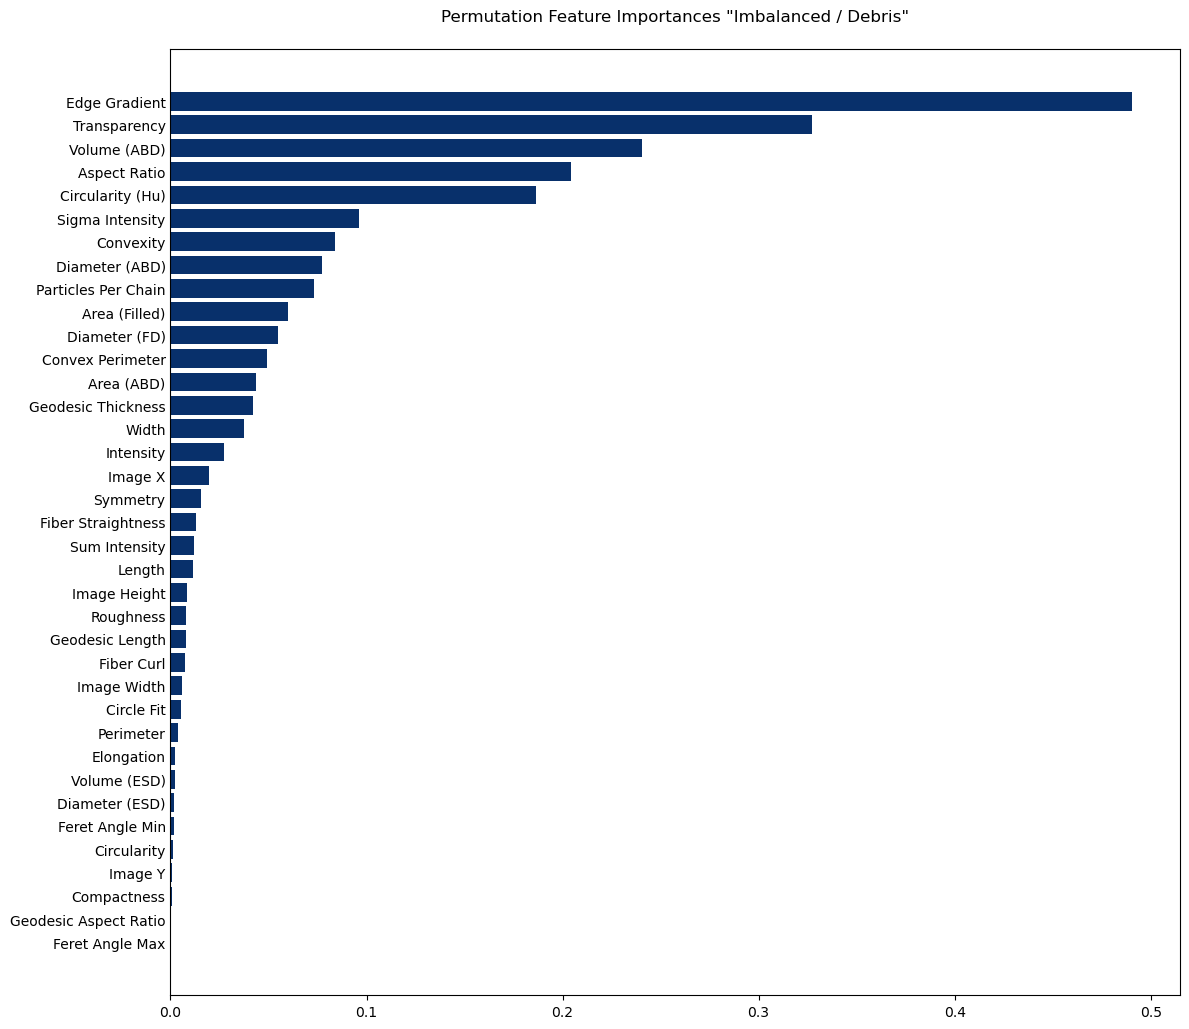

In [19]:
from sklearn.inspection import permutation_importance
from sklearn.metrics import make_scorer, f1_score

f1_macro_scorer = make_scorer(f1_score, average='macro')

results = permutation_importance(tree, X_test, y_test, scoring=f1_macro_scorer)

permutation_importances = pd.Series(results.importances_mean, index=X.columns)
sorted_permutation_importances = permutation_importances.sort_values(ascending=False)  

colors = ['#08306b'] 

fig, ax = plt.subplots(figsize=(12, 10))

bars = ax.barh(sorted_permutation_importances.index, sorted_permutation_importances.values,
               color=[colors[i % len(colors)] for i in range(len(sorted_permutation_importances))])

ax.invert_yaxis()
ax.set_xlim(left=0)

ax.tick_params(axis='y', which='both', length=0, labelsize=10) 
ax.tick_params(axis='x', which='both', labelsize=10)
plt.tight_layout() 
plt.title('Permutation Feature Importances "Imbalanced / Debris"', fontsize=12, pad=20)
plt.savefig('permutation_feature_importances_Imbalanced_DEBRIS.png', dpi=300, bbox_inches='tight')
plt.show()

In [142]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from sklearn.datasets import load_iris
import pandas as pd

cv_accuracies = []
cv_precisions = []
cv_recalls = []
cv_f1_scores = []

num_features_range = range(1, len(sorted_permutation_importances) + 1)

for num_features in num_features_range:
    selected_features = sorted_permutation_importances.index[:num_features]
    X_train_selected = X_train[selected_features]
    
    cut_clf = DecisionTreeClassifier(criterion='entropy', max_depth=20, random_state=1)
    
    # Accuracy
    cv_accuracy = cross_val_score(cut_clf, X_train_selected, y_train, cv=5, scoring='accuracy').mean()
    cv_accuracies.append(cv_accuracy)
    
    # Precision
    cv_precision = cross_val_score(cut_clf, X_train_selected, y_train, cv=5, scoring='precision_macro').mean()
    cv_precisions.append(cv_precision)
    
    # Recall
    cv_recall = cross_val_score(cut_clf, X_train_selected, y_train, cv=5, scoring='recall_macro').mean()
    cv_recalls.append(cv_recall)
    
    # F1 Score
    cv_f1_score = cross_val_score(cut_clf, X_train_selected, y_train, cv=5, scoring='f1_macro').mean()
    cv_f1_scores.append(cv_f1_score)

In [143]:
train_accuracies = []
test_accuracies = []
train_precisions = []
test_precisions = []
train_recalls = []
test_recalls = []
train_f1_scores = []
test_f1_scores = []

sorted_features = sorted_permutation_importances.index.tolist()

num_features_range = range(1, len(sorted_features) + 1)

for num_features in num_features_range:
    selected_features = sorted_features[:num_features]
    
    X_train_drop = X_train[selected_features]
    X_test_drop = X_test[selected_features]
    
    cut_clf = DecisionTreeClassifier(criterion='entropy', max_depth=20, random_state=1)
    cut_clf.fit(X_train_drop, y_train)
    
    y_train_pred = cut_clf.predict(X_train_drop)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_precision, train_recall, train_f1_score, _ = precision_recall_fscore_support(y_train, y_train_pred, average='macro')
    
    y_test_pred = cut_clf.predict(X_test_drop)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision, test_recall, test_f1_score, _ = precision_recall_fscore_support(y_test, y_test_pred, average='macro')
    
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
    train_precisions.append(train_precision)
    test_precisions.append(test_precision)
    train_recalls.append(train_recall)
    test_recalls.append(test_recall)
    train_f1_scores.append(train_f1_score)
    test_f1_scores.append(test_f1_score)

accuracy_diffs = np.array(train_accuracies) - np.array(test_accuracies)
precision_diffs = np.array(train_precisions) - np.array(test_precisions)
recall_diffs = np.array(train_recalls) - np.array(test_recalls)
f1_score_diffs = np.array(train_f1_scores) - np.array(test_f1_scores)

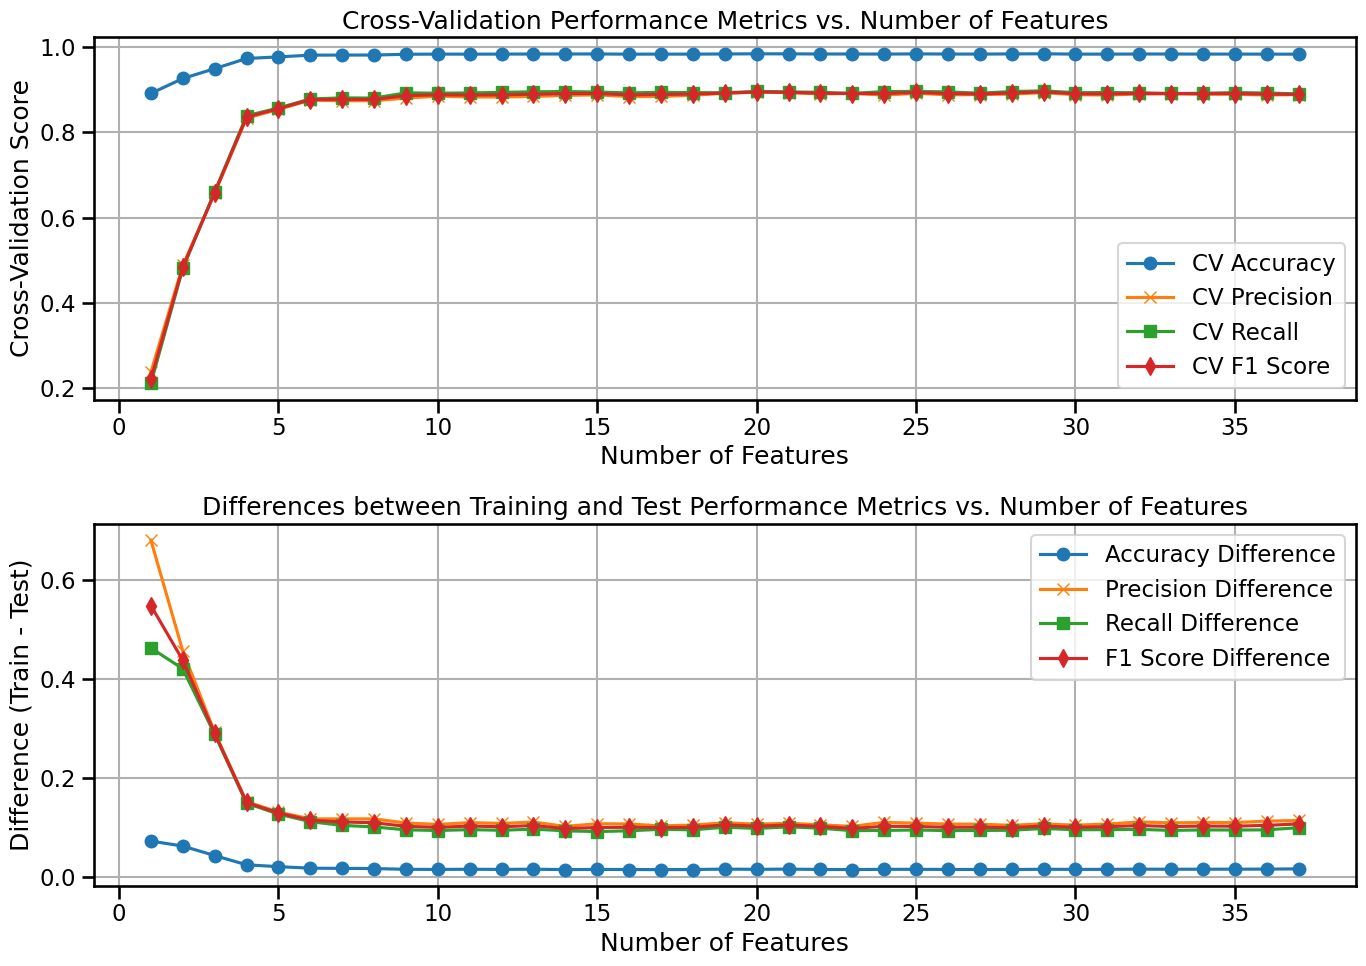

In [144]:
plt.figure(figsize=(14, 10))

plt.subplot(2, 1, 1)
plt.plot(num_features_range, cv_accuracies, label='CV Accuracy', linestyle='-', marker='o')
plt.plot(num_features_range, cv_precisions, label='CV Precision', linestyle='-', marker='x')
plt.plot(num_features_range, cv_recalls, label='CV Recall', linestyle='-', marker='s')
plt.plot(num_features_range, cv_f1_scores, label='CV F1 Score', linestyle='-', marker='d')
plt.xlabel('Number of Features')
plt.ylabel('Cross-Validation Score')
plt.title('Cross-Validation Performance Metrics vs. Number of Features')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(num_features_range, accuracy_diffs, label='Accuracy Difference', linestyle='-', marker='o')
plt.plot(num_features_range, precision_diffs, label='Precision Difference', linestyle='-', marker='x')
plt.plot(num_features_range, recall_diffs, label='Recall Difference', linestyle='-', marker='s')
plt.plot(num_features_range, f1_score_diffs, label='F1 Score Difference', linestyle='-', marker='d')
plt.xlabel('Number of Features')
plt.ylabel('Difference (Train - Test)')
plt.title('Differences between Training and Test Performance Metrics vs. Number of Features')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [145]:
import pickle
selected_features = sorted_importances.index[:9] 
with open('features/features_IMbalanced_DEBRIS.pkl', 'wb') as f:
    pickle.dump(selected_features, f)

# Load selected features

In [146]:
# Load the saved feature indices
with open('features/features_IMbalanced_DEBRIS.pkl', 'rb') as f:
    selected_features = pickle.load(f)

In [147]:
# drop columns that have low feature importances from training and validation sets
X_train_drop = X_train[selected_features]
X_test_drop = X_test[selected_features]

# train new tree with cut training set
cut_clf = DecisionTreeClassifier(criterion='entropy', max_depth=20, random_state=1)
cut_clf.fit(X_train_drop, y_train)

# validate with test set
print(metrics.accuracy_score(y_test, cut_clf.predict(X_test_drop)))



0.9838970985320831


In [148]:
print(metrics.classification_report(y_train, cut_clf.predict(X_train_drop)))
print(metrics.classification_report(y_test, cut_clf.predict(X_test_drop)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1128
           1       1.00      1.00      1.00       698
           2       1.00      1.00      1.00     86974
           3       1.00      1.00      1.00      2575
           4       1.00      1.00      1.00      1343
           5       1.00      1.00      1.00      1285
           6       1.00      1.00      1.00      1052

    accuracy                           1.00     95055
   macro avg       1.00      1.00      1.00     95055
weighted avg       1.00      1.00      1.00     95055

              precision    recall  f1-score   support

           0       0.75      0.77      0.76       484
           1       0.80      0.85      0.83       299
           2       0.99      0.99      0.99     37275
           3       0.95      0.95      0.95      1104
           4       0.91      0.88      0.90       575
           5       0.93      0.95      0.94       550
           6       0.90 

#### Check for overfitting

In [149]:
print('Accuracy on the training set:', metrics.accuracy_score(y_train, cut_clf.predict(X_train_drop)))
print('Accuracy on the test set:', metrics.accuracy_score(y_test, cut_clf.predict(X_test_drop)))

print('F1 Score on the training set (macro):', metrics.f1_score(y_train, cut_clf.predict(X_train_drop), average='macro'))
print('F1 Score on the test set (macro):', metrics.f1_score(y_test, cut_clf.predict(X_test_drop), average='macro'))

print('F1 Score on the training set (weighted):', metrics.f1_score(y_train, cut_clf.predict(X_train_drop), average='weighted'))
print('F1 Score on the test set (weighted):', metrics.f1_score(y_test, cut_clf.predict(X_test_drop), average='weighted'))


Accuracy on the training set: 0.9999894797748672
Accuracy on the test set: 0.9838970985320831
F1 Score on the training set (macro): 0.9999358274583603
F1 Score on the test set (macro): 0.898211630263739
F1 Score on the training set (weighted): 0.9999894774724624
F1 Score on the test set (weighted): 0.9839740799537101


In [150]:
X_train = X_train_drop
X_test= X_test_drop
best_tree = cut_clf

### Hyperparameter Tuning

In [151]:
# Randomized search
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import randint

params_dist = {
	'criterion': ['gini', 'entropy'],
	'max_depth': randint(low=1, high=100),
	'max_leaf_nodes': randint(low=500, high=50000),
    'min_samples_split': randint(low=2, high=200),
	'min_samples_leaf': randint(low=2, high=100)
}

results = []
for i in range(50):
    random_search = RandomizedSearchCV(DecisionTreeClassifier(random_state=1), params_dist, scoring = 'f1_macro', cv=7)
    random_search.fit(X_train, y_train)
    best_params_rand = random_search.best_params_
    best_params_rand['best_score_rand'] = random_search.best_score_
    results.append(best_params_rand)
    f"Run {i+1}: Best Parameters: {best_params_rand}"


results_df = pd.DataFrame(results)
results_df

,criterion,max_depth,max_leaf_nodes,min_samples_leaf,min_samples_split,best_score_rand
0,gini,20,37282,4,20,0.895033
1,gini,84,42695,12,28,0.884345
2,entropy,29,25539,14,5,0.890591
3,entropy,83,25091,12,122,0.883798
4,gini,99,49593,20,5,0.880666
5,entropy,20,32731,29,91,0.881589
6,entropy,64,41215,30,35,0.883476
7,entropy,25,4857,31,87,0.881192
8,entropy,89,11667,12,114,0.884748
9,entropy,9,25498,47,78,0.876478


In [152]:
random_search = RandomizedSearchCV(DecisionTreeClassifier(random_state=1), params_dist, cv=7, random_state=1)
random_search.fit(X_train, y_train)
print(random_search.best_params_)
print(random_search.best_score_)

{'criterion': 'entropy', 'max_depth': 65, 'max_leaf_nodes': 33412, 'min_samples_leaf': 3, 'min_samples_split': 73}
0.9822629207700218


In [153]:
best_tree = random_search.best_estimator_

# check performance of the tuned tree on the test set
print(metrics.classification_report(y_train, best_tree.predict(X_train)))
print(metrics.classification_report(y_test, best_tree.predict(X_test)))

              precision    recall  f1-score   support

           0       0.85      0.79      0.82      1128
           1       0.89      0.90      0.89       698
           2       0.99      0.99      0.99     86974
           3       0.95      0.95      0.95      2575
           4       0.92      0.92      0.92      1343
           5       0.97      0.92      0.95      1285
           6       0.91      0.92      0.92      1052

    accuracy                           0.99     95055
   macro avg       0.93      0.91      0.92     95055
weighted avg       0.99      0.99      0.99     95055

              precision    recall  f1-score   support

           0       0.81      0.77      0.79       484
           1       0.84      0.88      0.86       299
           2       0.99      0.99      0.99     37275
           3       0.93      0.93      0.93      1104
           4       0.90      0.88      0.89       575
           5       0.95      0.91      0.93       550
           6       0.89 

### save the trained and tuned tree as a file

In [154]:
from joblib import dump, load
dump(best_tree, './trees/tree_IMbalanced_DEBRIS.joblib')

['./trees/tree_IMbalanced_DEBRIS.joblib']

# Load the trained tree from file

In [155]:
from joblib import dump, load
best_tree = load('./trees/tree_IMbalanced_DEBRIS.joblib')
best_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=65, max_leaf_nodes=33412,
                       min_samples_leaf=3, min_samples_split=73,
                       random_state=1)

#### Check for overfitting again

In [156]:
print('Accuracy on the training set:', metrics.accuracy_score(y_train, best_tree.predict(X_train)))
print('Accuracy on the test set:', metrics.accuracy_score(y_test, best_tree.predict(X_test)))

print('F1 Score on the training set (macro):', metrics.f1_score(y_train, best_tree.predict(X_train), average='macro'))
print('F1 Score on the test set (macro):', metrics.f1_score(y_test, best_tree.predict(X_test), average='macro'))

print('F1 Score on the training set (weighted):', metrics.f1_score(y_train, best_tree.predict(X_train), average='weighted'))
print('F1 Score on the test set (weighted):', metrics.f1_score(y_test, best_tree.predict(X_test), average='weighted'))


Accuracy on the training set: 0.9872810478144233
Accuracy on the test set: 0.9839461927438755
F1 Score on the training set (macro): 0.9202015050949377
F1 Score on the test set (macro): 0.9007835457389325
F1 Score on the training set (weighted): 0.9872022296682039
F1 Score on the test set (weighted): 0.9838981285341043


## Prediction on test set

In [158]:
# use model with test data
predictions = best_tree.predict(X_test)
print(metrics.classification_report(y_test, best_tree.predict(X_test)))

              precision    recall  f1-score   support

           0       0.81      0.77      0.79       484
           1       0.84      0.88      0.86       299
           2       0.99      0.99      0.99     37275
           3       0.93      0.93      0.93      1104
           4       0.90      0.88      0.89       575
           5       0.95      0.91      0.93       550
           6       0.89      0.93      0.91       451

    accuracy                           0.98     40738
   macro avg       0.90      0.90      0.90     40738
weighted avg       0.98      0.98      0.98     40738



In [159]:
predictions_decoded = label_encoder.inverse_transform(predictions)
predictions_decoded

array(['DEBRIS', 'LUCU', 'DEBRIS', ..., 'DEBRIS', 'DEBRIS', 'DEBRIS'],
      dtype=object)

In [160]:
unique_values, counts = np.unique(predictions_decoded, return_counts=True)
for value, count in zip(unique_values, counts):
    print(f"{value}: {count}")

ANCR: 465
ANLO: 312
DEBRIS: 37304
LUCU: 1104
NELU: 558
TEMA: 523
TRSP: 472


In [161]:
from sklearn.metrics import classification_report

# test difference between untuned and tuned tree for test data
print('Classification report for the original tree:')
print()
print(metrics.classification_report(y_test, tree.predict(X_test_orig)))
print('Classification report for the tuned tree:')
print()
print(metrics.classification_report(y_test, best_tree.predict(X_test)))

with open('classification_report_IMbalanced_DEBRIS.txt', 'w') as file:
    file.write(metrics.classification_report(y_test, best_tree.predict(X_test)))

Classification report for the original tree:

              precision    recall  f1-score   support

           0       0.77      0.78      0.77       484
           1       0.79      0.85      0.82       299
           2       0.99      0.99      0.99     37275
           3       0.97      0.97      0.97      1104
           4       0.87      0.87      0.87       575
           5       0.95      0.95      0.95       550
           6       0.89      0.92      0.91       451

    accuracy                           0.98     40738
   macro avg       0.89      0.91      0.90     40738
weighted avg       0.98      0.98      0.98     40738

Classification report for the tuned tree:

              precision    recall  f1-score   support

           0       0.81      0.77      0.79       484
           1       0.84      0.88      0.86       299
           2       0.99      0.99      0.99     37275
           3       0.93      0.93      0.93      1104
           4       0.90      0.88      0.89